In [ ]:
!nvidia-smi # Ekran kartı tespiti yapar

Tue Oct 22 10:11:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
# Mevcut dizini 'HOME' değişkenine atar
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Kütüphane entegrasyonları ve sistem yapılandırmaları
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks() # Sistemin uygun olarak yapılandırılıp yapılandırılmadığını kontrol eder

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.0/235.7 GB disk)


In [ ]:
# Transfer Learning
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt') # Önceden eğitilmiş modeli entegre eder
image = Image.open(requests.get('https://media.roboflow.com/notebooks/examples/dog.jpeg', stream=True).raw) # URL'deki resim belleğe yüklenir
result = model.predict(image, conf=0.25)[0] # Görüntü üzerinde tahmin yapılır güven eşiği (conf) %25 in altına olan tespitler dikkate alınmaz

100%|██████████| 5.35M/5.35M [00:00<00:00, 71.4MB/s]



0: 640x384 2 persons, 1 car, 1 dog, 1 handbag, 58.5ms
Speed: 26.6ms preprocess, 58.5ms inference, 724.3ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1aZbAmRZoc4QIOeT0RLg")
project = rf.workspace("ilk-deneme").project("trafik_isiklari-kcof2")
version = project.version(11)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trafik_Isiklari-11 in yolov11:: 100%|██████████| 1014/1014 [00:00<00:00, 6441.87it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True # 100 epoch ile eğitim yapıldı

/content
100% 18.4M/18.4M [00:00<00:00, 142MB/s] 
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Trafik_Isiklari-11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

In [ ]:
!ls {HOME}/runs/detect/train/ # train dizininin içeriğini görüntüler

args.yaml					    P_curve.png       train_batch2520.jpg
confusion_matrix_normalized.png			    PR_curve.png      train_batch2521.jpg
confusion_matrix.png				    R_curve.png       train_batch2522.jpg
events.out.tfevents.1729591958.9b686b46ae83.6361.0  results.csv       train_batch2.jpg
F1_curve.png					    results.png       val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					    train_batch1.jpg  weights


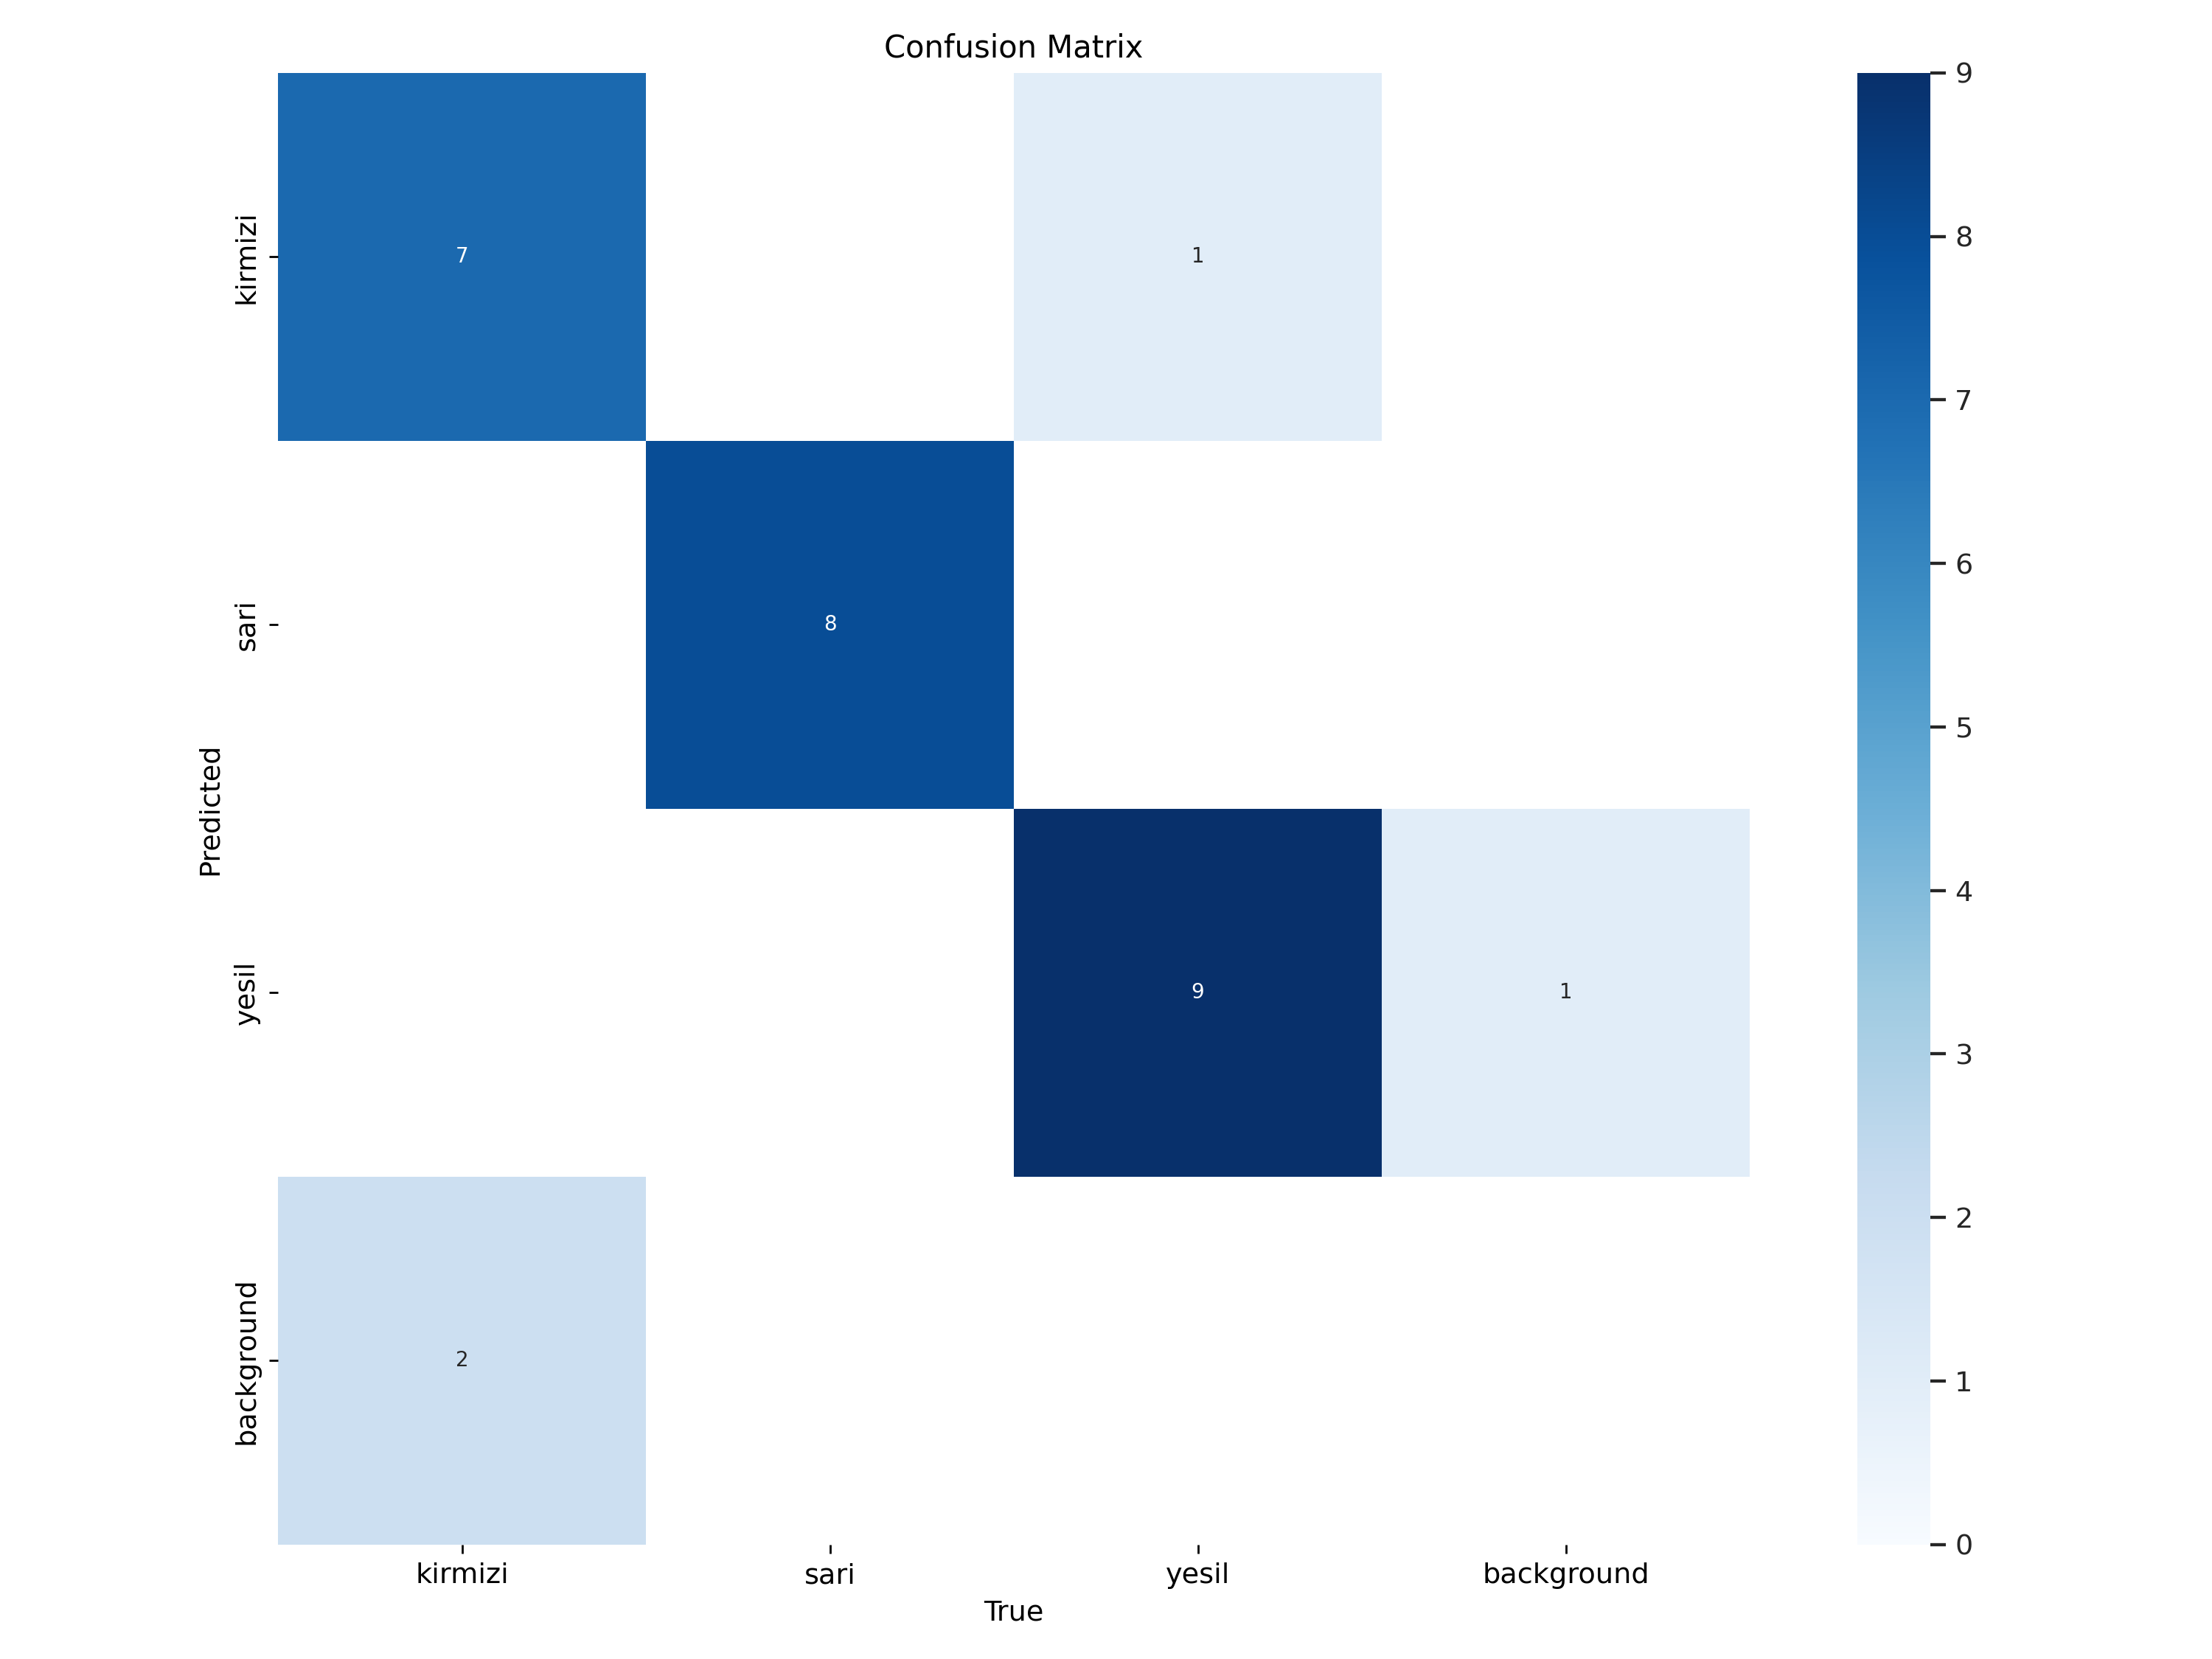

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600) # Confusion matrix'i ekrana bastırır

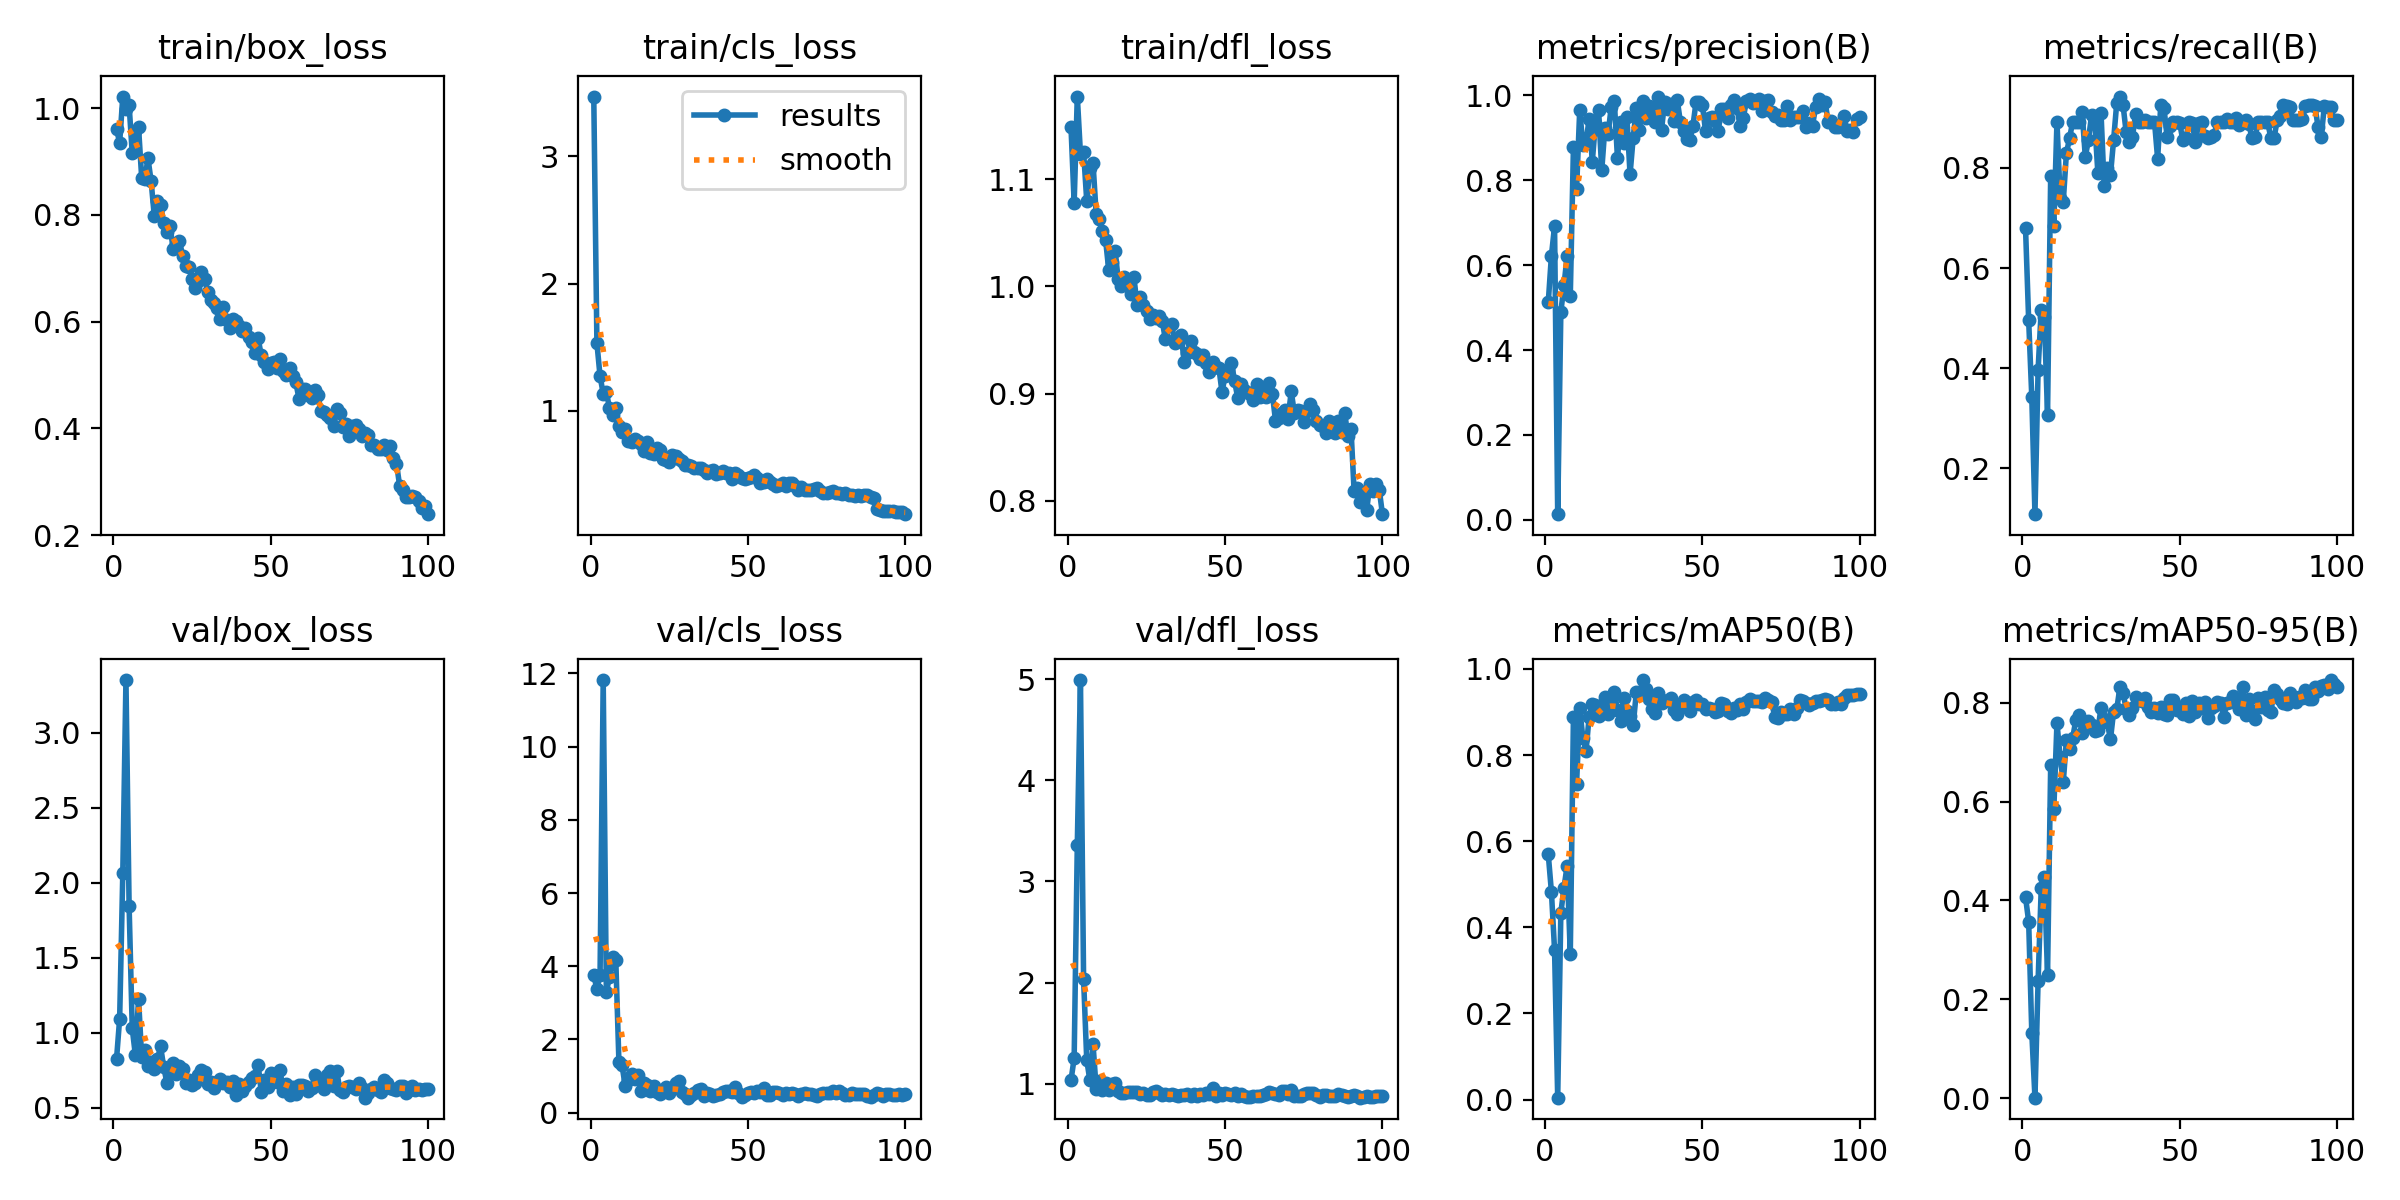

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600) # Çeşitli metriklerin değişimini gösteren grafikleri ekrana bastırır

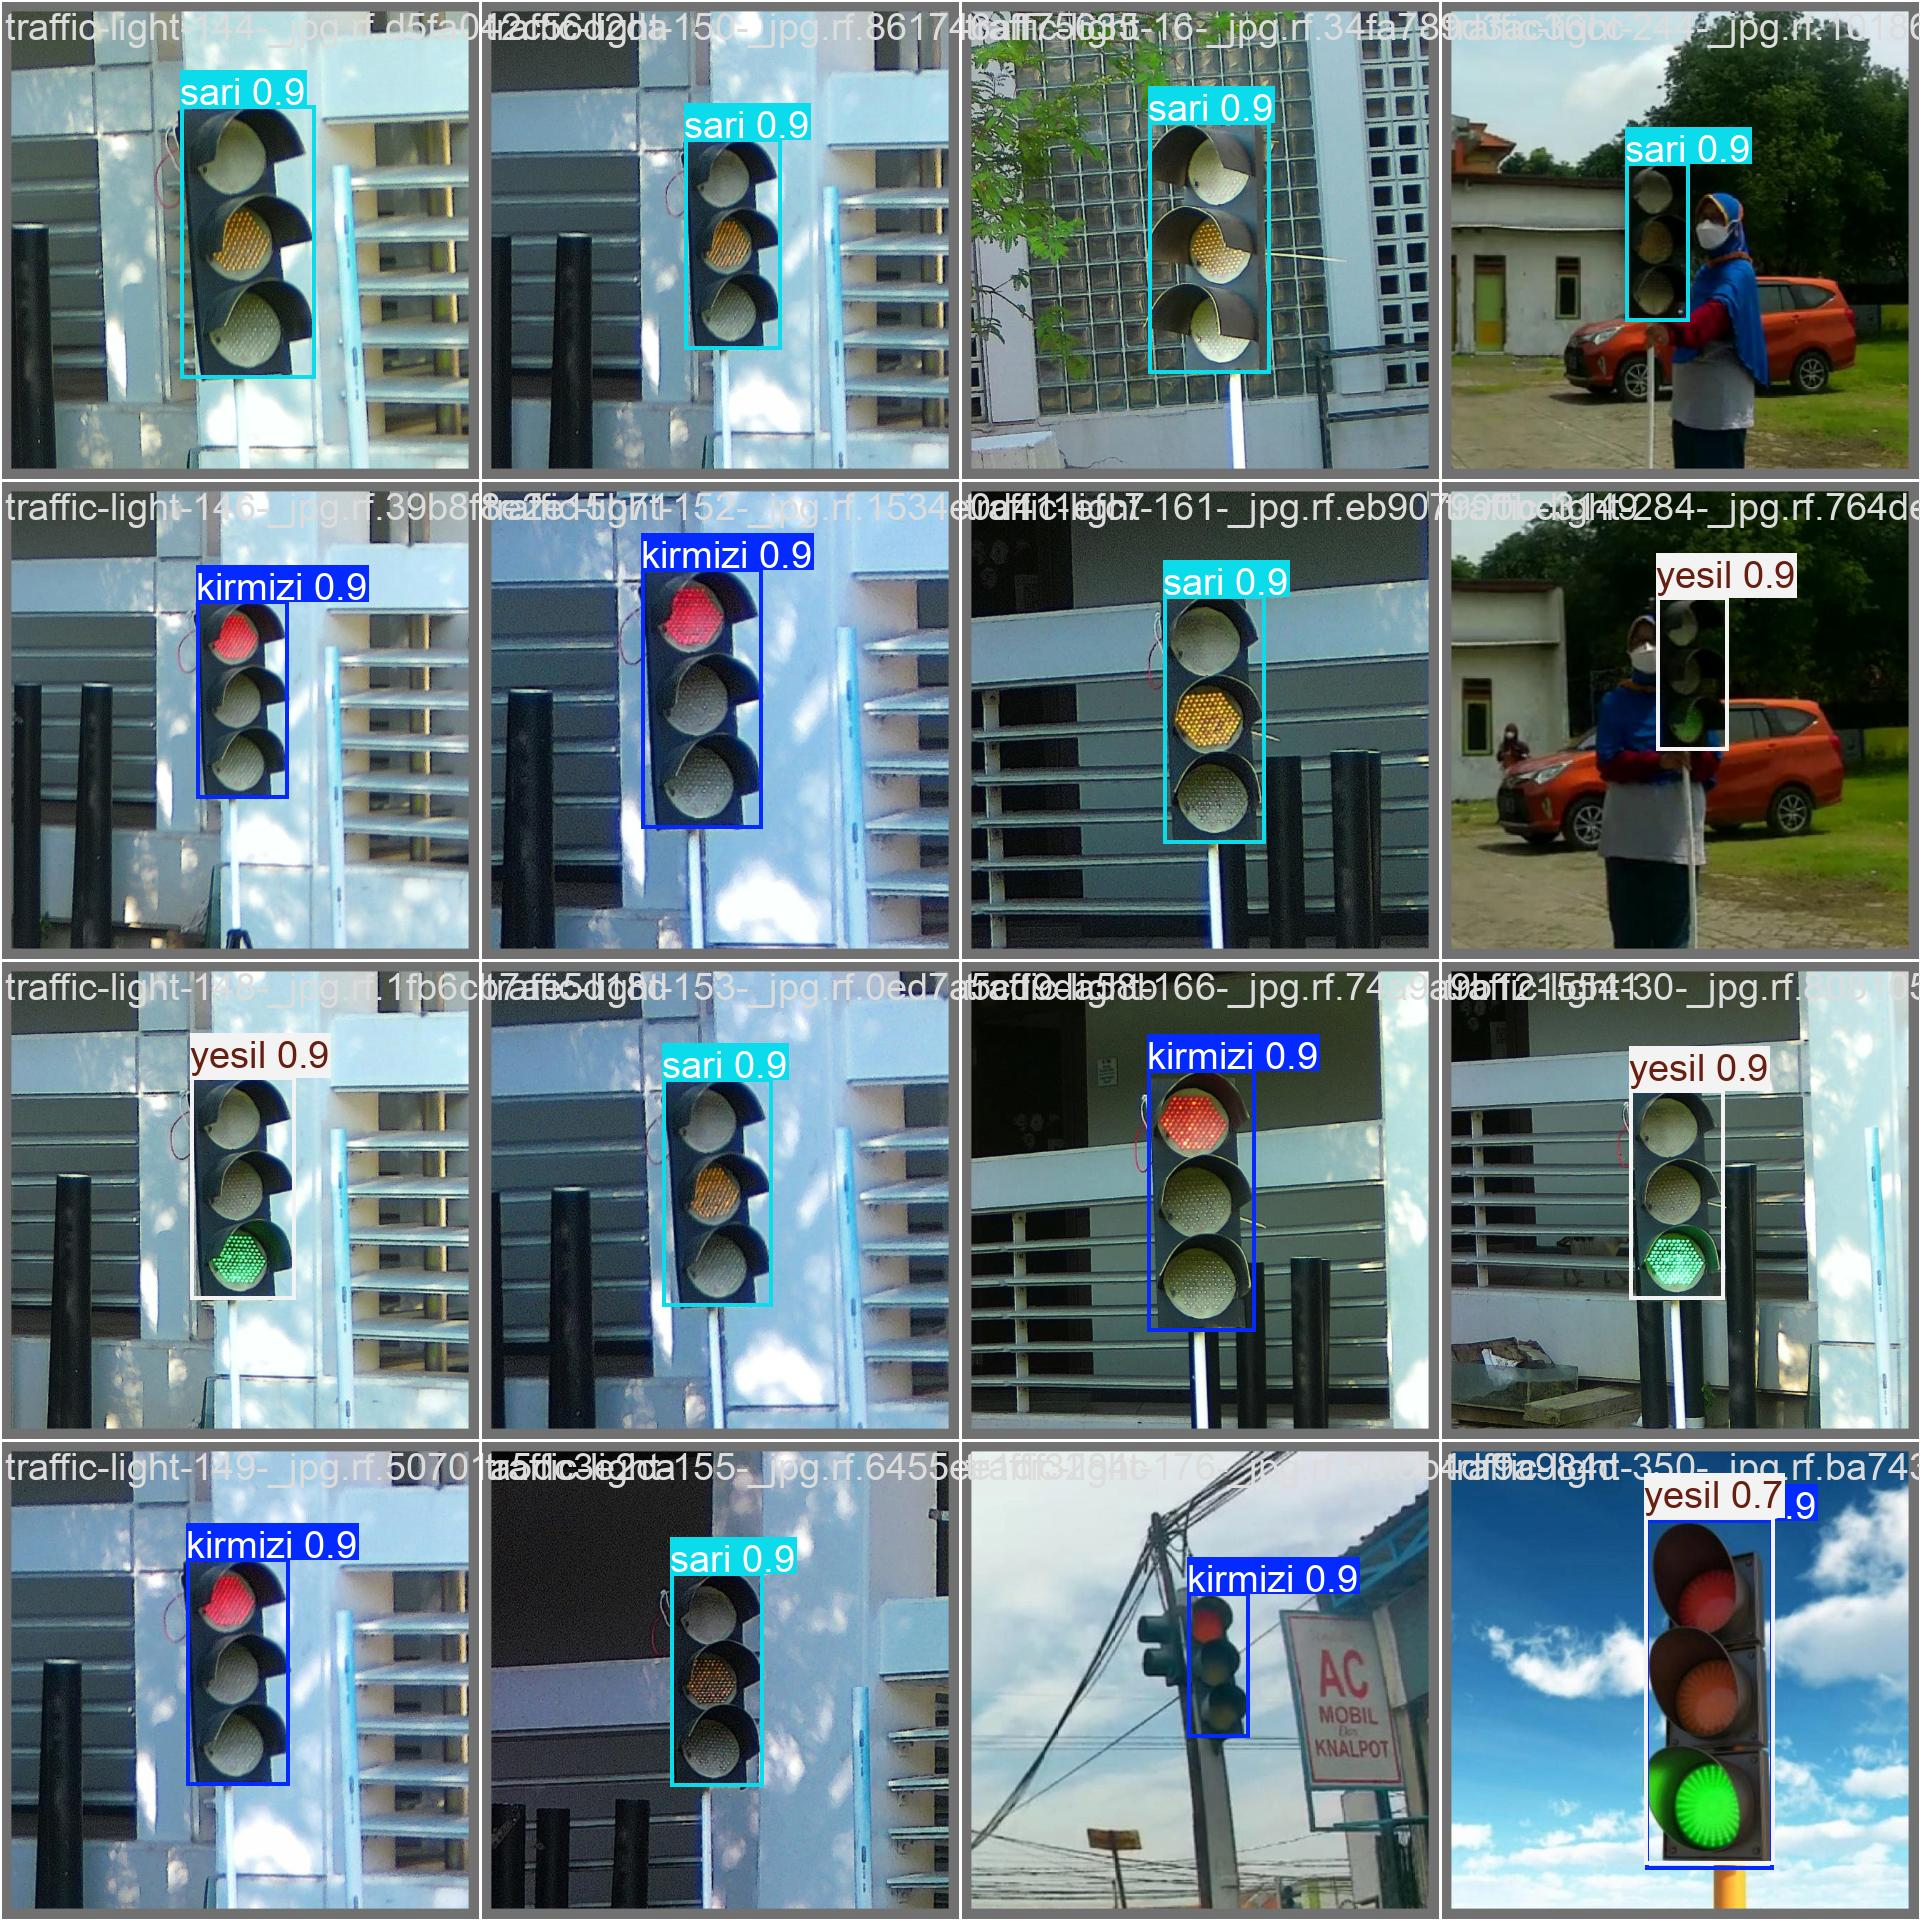

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600) # Doğrulama seti için yapılan tahminler ekrana bastırılır

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml # Modeli doğrulama modunda çalıştırır ve performans metriklerini ekrana bastırır

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/Trafik_Isiklari-11/valid/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.51it/s]
                   all         23         27      0.915      0.922      0.939      0.843
               kirmizi          7          9      0.813      0.778      0.828      0.757
                  sari          8          8      0.931          1      0.995       0.93
                 yesil          8         10          1      0.988      0.995       0.84
Speed: 3.7ms preprocess, 13.1ms inference, 0.0ms loss, 30.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True # Model tahmin modunda çalıştırılır

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s summary (fused): 238 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs

image 1/40 /content/Trafik_Isiklari-11/test/images/554_png_jpg.rf.f56a65ff0ae307c7cd039f80cdbfebd9.jpg: 640x640 1 kirmizi, 1 sari, 1 yesil, 12.2ms
image 2/40 /content/Trafik_Isiklari-11/test/images/62_png_jpg.rf.d42a33a123c0c7084421955d05511664.jpg: 640x640 1 kirmizi, 10.7ms
image 3/40 /content/Trafik_Isiklari-11/test/images/AA1nYJmz_jpg.rf.40fd519ec80ebface962dd18b828f84b.jpg: 640x640 1 kirmizi, 9.7ms
image 4/40 /content/Trafik_Isiklari-11/test/images/Modern_British_LED_Traffic_Light_jpg.rf.a27b6d98e70ad11bee8f315a689b02ac.jpg: 640x640 1 kirmizi, 9.6ms
image 5/40 /content/Trafik_Isiklari-11/test/images/e5a203386a8ed942aad1994be9feba7b_jpg.rf.1a7b509fa7d2256afab6687dab6925f4.jpg: 640x640 1 sari, 10.1ms
image 6/40 /content/Trafik_Isiklari-11/test/images/istockphoto-1191495590-612x612_jpg.rf.df751217e1c8586419e

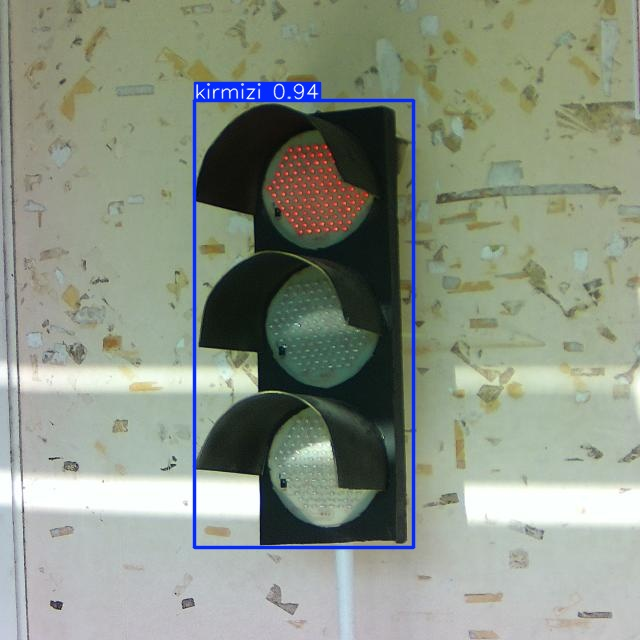

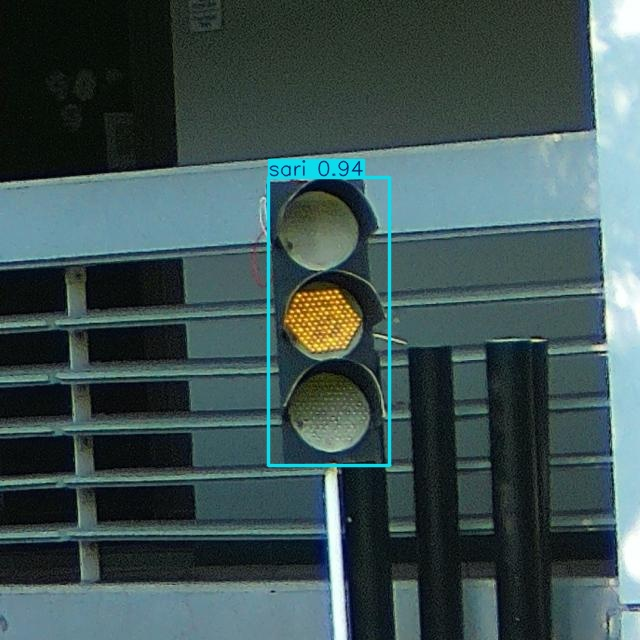

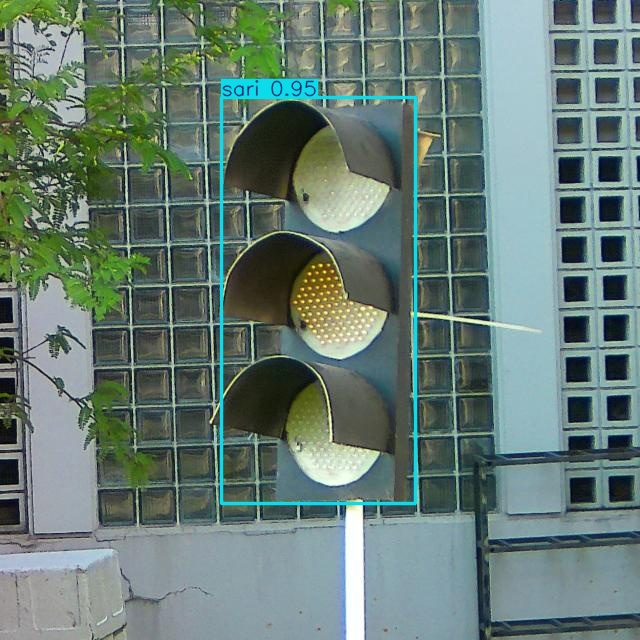

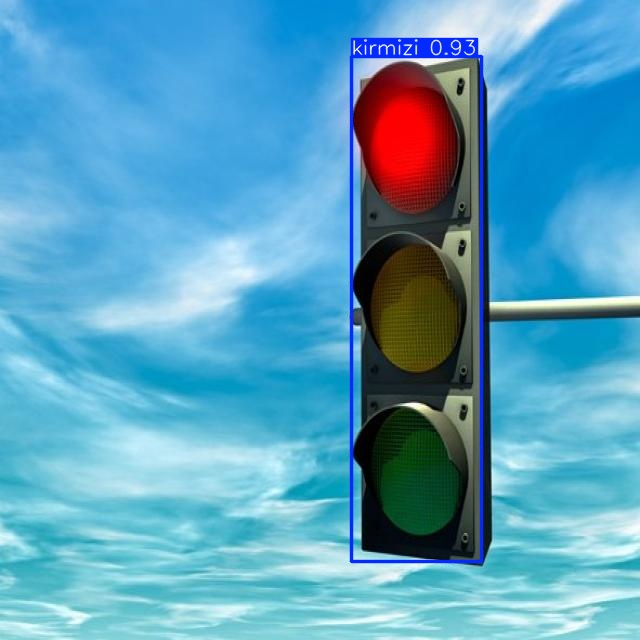

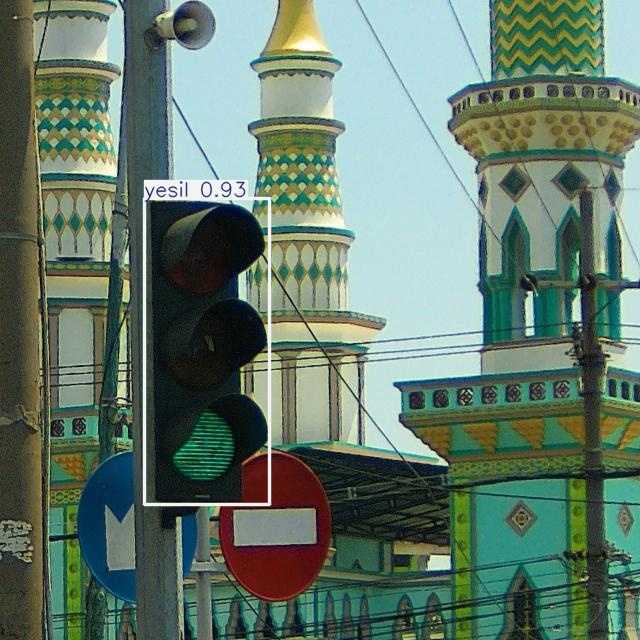

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime) # Belirtilen dizindeki predict ile başlayan klasörleri bulur ve bunların arasından en son değiştirilmiş olanı seçer
for img in glob.glob(f'{latest_folder}/*.jpg')[:5]: # Tahmin sonuçlarından ilk 5 ini seçer
    display(IPyImage(filename=img, width=600)) # Seçilen görüntüler ekrana bastırılır
    print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


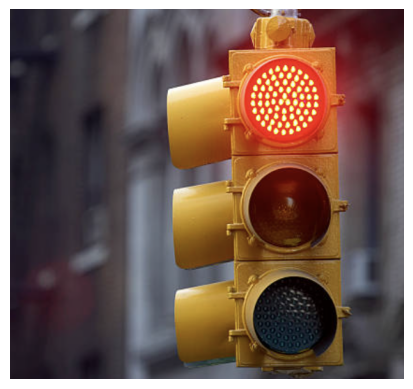

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Görüntü dosyasının yolu
image_path = '/content/drive/MyDrive/Fotograflar/test1.png'

# Görüntüyü yükle
img = Image.open(image_path)

# Görüntüyü göster
plt.imshow(img)
plt.axis('off')  # Eksenleri kapatmak için
plt.show()